In [1]:
#library yang dibutuhkan

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pkg_resources

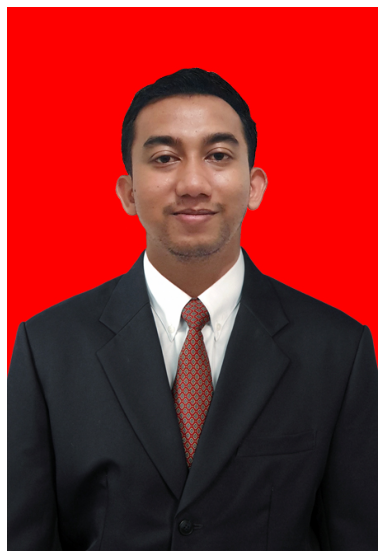

In [2]:
#membaca file dengan opencv
img = cv2.imread("rgb.jpg")
base_img = img.copy()

#Menampilkan hasil membaca file dengan matplotlib
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(img[:,:,::-1])

In [3]:
#Mendeteksi wajah dengan bantuan library opencv

face_detector_path = pkg_resources.resource_filename('cv2', 'data/haarcascade_frontalface_default.xml')
face_detector = cv2.CascadeClassifier(face_detector_path)
faces = face_detector.detectMultiScale(img, 1.3, 5)

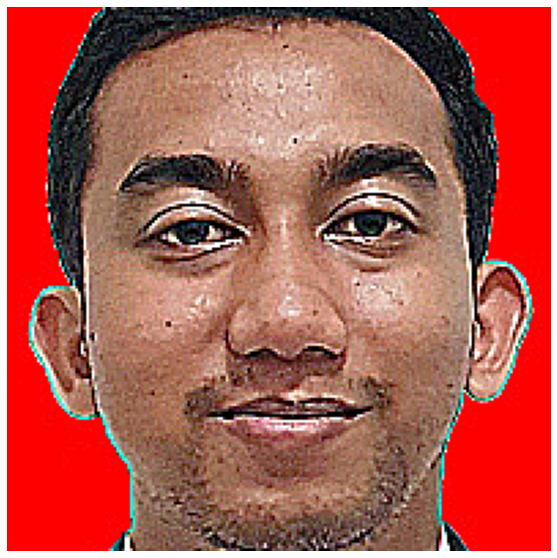

In [4]:
#Hasil deteksi wajah dengan opencv dilakukan cropping dan dilakukan sharpen

for x, y, w, h in faces:
    detected_face = img[int(y):int(y+h), int(x):int(x+w)]
    filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]) #Set filter normal sharpening
    #filter = np.array([[1, 1, 1], [1, -7, 1], [1, 1, 1]]) #Set filter excessive sharpening
    
    sharpen_img_1=cv2.filter2D(detected_face,-1,filter) # Applying cv2.filter2D function on our Cybertruck image
    img[y:y+h, x:x+w] = sharpen_img_1
    
    plt.figure(figsize = (10,10))
    plt.axis('off')
    plt.imshow(sharpen_img_1[:,:,::-1])

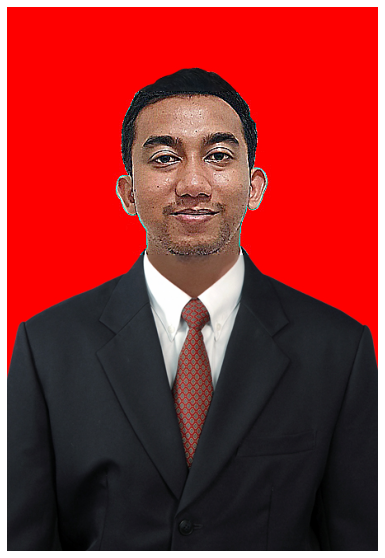

In [5]:
#Menampilkan hasil croping dan backrgound yang di sharpen

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(img[:,:,::-1])

In [6]:
cv2.imwrite('FaceSharpen.jpg', img)

True